### What are the most demanded skills for top 3 Data Roles

## Methodology
1. Clean the skill column
2. Calculate the skill count based on job_title_short
3. Calculate skill percentage
4. Plot the final findings

In [1]:
#Importing Libraries

import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data cleanup

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\HP\anaconda3\envs\project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#Filering the dataframe for United states only

df_DA_US = df[df["job_country"] == "United States"]

In [ ]:
# Explode the job skills column -  from a list to individual rows
df_exploded = df_DA_US.explode("job_skills")


df_counts = df_exploded[["job_title_short", "job_skills"]]


In [ ]:

# Grouping by the  job title and the job skills - size is used because its on two columns

skills_count = df_counts.groupby(["job_title_short", "job_skills"]).size()

# Reset index turns it into a datframme and name the column

df_skills_count = skills_count.reset_index(name="skill_count")

#

df_skills_count.sort_values(by="skill_count", ascending=False, inplace = True)

df_skills_count

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


In [ ]:
# Getting a list of top 3 job_titles to run the analysis on

job_title = df_skills_count["job_title_short"].unique().tolist()

# Sorting te list and providing the top 3 rows
job_title = sorted(job_title[:3])

job_title

['Data Analyst', 'Data Engineer', 'Data Scientist']

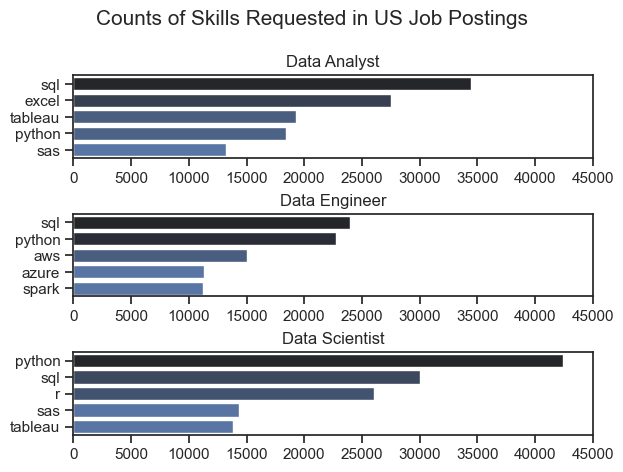

In [ ]:
fig, ax = plt.subplots(len(job_title), 1)

sns.set_theme(style="ticks")

#

for i , title in enumerate(job_title):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == title].head(5)[::-1]
    sns.barplot(data=df_plot, x="skill_count", y = "job_skills", ax = ax[i], hue= "skill_count", palette="dark:b_r")

    ax[i].set_title(title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000)

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [ ]:
# To determine the percentage of skills appearing in job postings of a specific job title

df_job_counts = df_DA_US["job_title_short"].value_counts()

df_job_counts = df_job_counts.reset_index(name='jobs_total')
df_job_counts


,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [ ]:

#Merging both dataframe
df_skills_perc = pd.merge(df_skills_count, df_job_counts, on='job_title_short', how='left')
#Creating a new column to determine the percentage 
df_skills_perc ['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] * 100)

df_skills_perc




,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


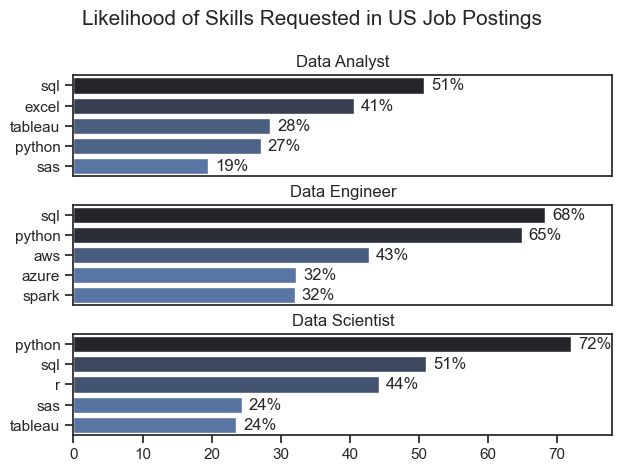

In [56]:
fig, ax = plt.subplots(len(job_title), 1)

sns.set_theme(style="ticks")

for i , title in enumerate(job_title):
    df_plot = df_skills_perc[df_skills_perc["job_title_short"] == title].head(5)[::-1]
    sns.barplot(data= df_plot, x="skill_percent", y = "job_skills", ax = ax[i], hue= "skill_count", palette="dark:b_r")
    
    ax[i].set_title(title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)

#Removing x-ticks label for readability
    if i != len(job_title) -1:
        ax[i].set_xticks([])

#Formatting the skills percent
    for n,v in enumerate(df_plot["skill_percent"]):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

